# U.S. Medical Insurance Costs
(This is a work in progress, it will be improved as I learn more)

# 1. Overview

This project aims to showcase some investgative skills learnt so far (45% complete) through the Data Science Career Path on Codecademy. It will involve a CSV file which I will analyze to come up with some findings and potitnital use cases for this dataset. (This is a work in progress so may be improved over time with more experience) 

## 1.1 Contents

1. Overview  
&ensp;1.1 Contents  
&ensp;1.2 Observing the Data  
&ensp;1.3 Goals
2. Descriptive Analysis  
&ensp;2.1 Helper Funcitons  
&ensp;2.2 Describing the Variables  
&ensp;&ensp;&ensp;2.2.1 Age  
&ensp;&ensp;&ensp;2.2.2 BMI  
&ensp;&ensp;&ensp;2.2.3 Children  
&ensp;&ensp;&ensp;2.2.4 Charges  

## 1.2 Observing the Data
From observing the data set, it is structured as follows:
|Name|Type|
|:---|:---|
|age|numerical (int)|
|sex|categorical (male/female)|
|bmi|numerical (float)|
|children|numerical (int)|
|smoker|categorical (yes/no)|
|region|categorical|
|charges|numerical (float)|

[comment]: <> (For analysis the data will need to be slightly adjusted to allow for easy processing. "smoker" and "sex" can be changed to a binay category value. 1 = "yes" and "male". )
There doesn't seem to be any missing data.

In [2]:
#import csv into variable
import csv

insurance_data = csv.DictReader(open("insurance.csv"))

#store columns as perameters
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

for row in insurance_data:
    age.append(int(row['age']))
    sex.append(row['sex'])
    bmi.append(float(row['bmi']))
    children.append(int(row['children']))
    smoker.append(row['smoker'])
    region.append(row['region'])
    charges.append(float(row['charges']))
    

## 1.3 Goals
- [X] Descriptive Analysis, (mean, mode, range, count, of each variable)
- [ ] Exploratory Analysis, do some investication into correlations between columns



# 2 Descriptive Analysis

I will first do some descriptive analysis to understand the dataset better. Will inlude varius displays of values and charts.

numerical:

- mean - center of the distribution
- standard deviation - sread of the distribution (lower the less variability)
- skewness 
-
- mode - peak of the distribution
-
- median - middle value of data, robust
- interquartile range - robust
-
- range
- variance

categorical:

- frequency - the count
- proprtion - frequency/total
- percentage - proportion converted



## 2.1 Helper Funcitons

In [3]:
#helper funcitons
import statistics
from scipy import stats
from collections import Counter

#numerical data
def get_mean(data): return sum(data)/len(data)

def get_median(data): return sorted(data)[len(data)//2]

def get_mode(data): return Counter(data).most_common(1)[0][0]

def get_range(data): return abs(max(data) - min(data))

def get_iqr(data): return stats.iqr(data)

def get_stdev(data): return statistics.stdev(data)

def get_variance(data): return statistics.variance(data)
   

In [4]:
#categorical data
def get_frequency(data): return dict(Counter(data))

def get_proportion(frequency): return {key:frequency[key]/sum(frequency.values()) for key in dict(frequency)}

def get_percentage(proportion): return {key: proportion[key]*100 for key in proportion}

                                                                                      

In [5]:
def get_numerical_variable_info(data):
    variable_info = {
        "mean":get_mean(data),
        "median":get_median(data),
        "mode":get_mode(data),
        "range":get_range(data),
        "iqr":get_iqr(data),
        "stdev":get_stdev(data),
        "variance":get_variance(data),
        "max":max(data),
        "min":min(data)
    }
    return variable_info

In [6]:
def get_categorical_variable_info(data):
    variable_info = {
        "frequency" : get_frequency(data)
    }
    variable_info["proportion"] = get_proportion(variable_info['frequency'])
    variable_info["percentage"] = get_percentage(variable_info['proportion'])
    return variable_info

In [7]:
get_categorical_variable_info(region)

{'frequency': {'southwest': 325,
  'southeast': 364,
  'northwest': 325,
  'northeast': 324},
 'proportion': {'southwest': 0.2428998505231689,
  'southeast': 0.27204783258594917,
  'northwest': 0.2428998505231689,
  'northeast': 0.242152466367713},
 'percentage': {'southwest': 24.28998505231689,
  'southeast': 27.204783258594915,
  'northwest': 24.28998505231689,
  'northeast': 24.2152466367713}}

In [8]:
def create_numeric_plots(data):
    import matplotlib.pyplot as plt
    #to fix errors when making labels
    from importlib import reload
    variable_info = get_numerical_variable_info(data)
    print(variable_info)
    
    plt=reload(plt)

    fig, ax = plt.subplots(2,1)
    fig.tight_layout()


    bg_color = [1,1,1,0.5]

    #distribution analysis histogram
    bin_num = round(variable_info['range'])/2 if len(data) < 50 else 50
    ax[0].hist(data, bins=bin_num, edgecolor='k')
    ax[0].axvline(variable_info['mean'], color='k', linestyle='dashed')
    ax[0].text(variable_info['mean'] + 0.6, 0, f'mean: {round(variable_info["mean"])}', rotation=90, va='bottom', backgroundcolor=bg_color)
    ax[0].axvline(variable_info['mode'], color='k', linestyle='dashed')
    ax[0].text(variable_info['mode'] + 0.6, 0, f'mode: {round(variable_info["mode"])}', rotation=90, va='bottom', backgroundcolor=bg_color)
    ax[0].axvline(variable_info['median'], color='k', linestyle='dashed')
    ax[0].text(variable_info['median'] - 1.6, 0, f'median: {round(variable_info["median"])}', rotation=90, va='bottom', backgroundcolor=bg_color)

    #outlier analysis box plot
    ax[1].boxplot(data, vert= 0, widths=0.5)
    ax[1].text(variable_info['median'] + 0.5, 1.3, f'iqr: {round(variable_info["iqr"])}', va='center', ha='center')
    ax[1].text(variable_info['max'], 1, f'max: {round(variable_info["max"])}', va='center', ha='center', rotation=90,backgroundcolor=bg_color)
    ax[1].text(variable_info['min'], 1, f'min: {round(variable_info["min"])}', va='center', ha='center', rotation=90,backgroundcolor=bg_color)

    plt.show()


## 2.2 Describing the variables

### 2.2.1 Age

- [ ] somethings happening at 18

- [ ] nothing after 64 or before 18

- [ ] even spread apart form 18

{'mean': 39.20702541106129, 'median': 39, 'mode': 18, 'range': 46, 'iqr': 24.0, 'stdev': 14.049960379216156, 'variance': 197.40138665754378, 'max': 64, 'min': 18}


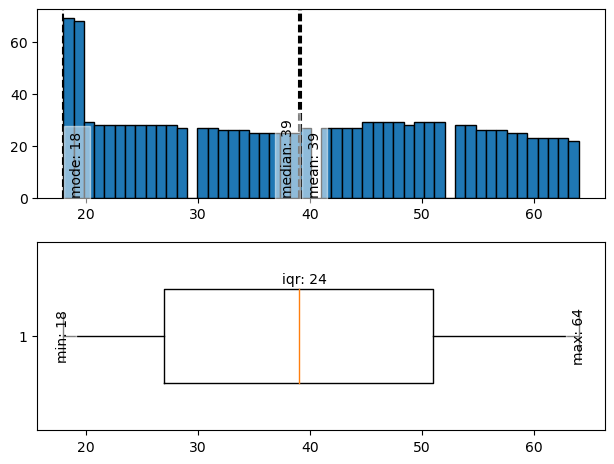

In [23]:
create_numeric_plots(age)

the top two graphs show that the spread of the data is quite even across the age groups, with a spike at age 18. understanding if this is a good sample of ages needs investigation to find if this has a similar spread to the spread of the ages of total population of the US.

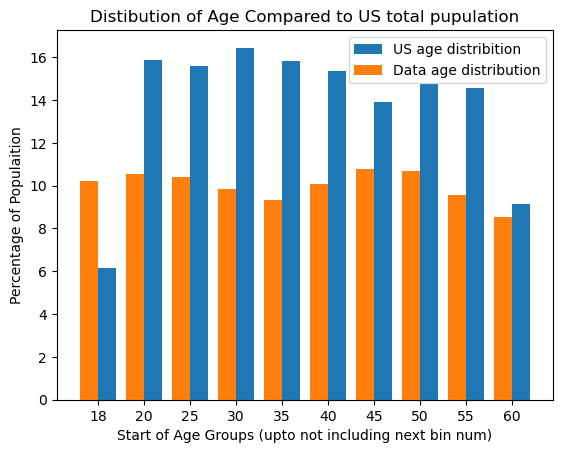

In [43]:
import matplotlib.pyplot as plt
import numpy as np

us_population_data = csv.DictReader(open("other datasets/us-population-gender.csv"))

bins = [15,20,25,30,35,40,45,50,55,60,65]
#process us population data for spine graph
labels = []
total_male = 0
total_female = 0
us_totals = {}
for row in us_population_data:
    label = row['ï»¿label'].split(' ')[0]
    if label != "Under":
        label = int(label)
    else:
        label = 0
        
    if label in bins and label != 65:    
        us_totals.setdefault(label, 0)
        us_totals[label] = (int(row["total"].replace(',', '')))
        total_male += int(row['male'].replace(',', ''))
        total_female += int(row['female'].replace(',', ''))

us_totals[15] = (us_totals[15]/5) * 2 # make an estimate for only 18 and 19 year olds
us_totals[60] = (us_totals[60]/5) * 3 # make an estimage removing above 64

#process age data for spine graph
age_totals ={}
for each in age:
    bin = 0
    for i in range(len(bins), 0, -1):
        if i > len(bins) -1:
            continue
        if each < bins[i]:
            bin = bins[i-1]
        
    total = age_totals.setdefault(bin,0)
    age_totals[bin] += 1


#turn into usable lists for plotting
us_total_num = sum(list(us_totals.values())[3:13])
us_percentages = {key:(us_totals[key]/us_total_num)*100 for key in us_totals} 

age_total_num = sum(age_totals.values())
age_percentages = {key:(age_totals[key]/age_total_num)*100 for key in age_totals}

us_percentages_list = list(zip(us_percentages.keys(), us_percentages.values()))
age_percentages_list =list(zip(age_percentages.keys(), age_percentages.values()))

us_percentages_list.sort()
age_percentages_list.sort()

us_bars = [i[1] for i in us_percentages_list]
age_bars = [i[1] for i in age_percentages_list]

x_values = np.arange(len(age_bars))
bins.pop(0)
bins.insert(0,18) #rename lowest bin

plt.bar(x_values+0.2, us_bars, 0.4, label='US age distribition')
plt.bar(x_values-0.2, age_bars, 0.4, label='Data age distribution')

plt.xticks(x_values, bins[:-1]) 
plt.xlabel("Start of Age Groups (upto not including next bin num)") 
plt.ylabel("Percentage of Populaition") 
plt.title("Distibution of Age Compared to US total pupulation") 
plt.legend() 

plt.show()


Comparing the spread of the ages in our data with the general population ([as of 222](https://data.census.gov/table/ACSST1Y2022.S0101?q=population%20by%20age)), we can see that this spike at 18-20 is not aligned with the general population trends. the data also seems to have more over 60 data points compared to the proportions within the general population. The US age distribution dataset includes the total population, not just those with medical insurane. this dataset may not be proportionally representitive of all age groups. 

### BMI

{'mean': 30.663396860986538, 'median': 30.4, 'mode': 32.3, 'range': 37.17, 'iqr': 8.3975, 'stdev': 6.098186911679014, 'variance': 37.18788360977324, 'max': 53.13, 'min': 15.96}


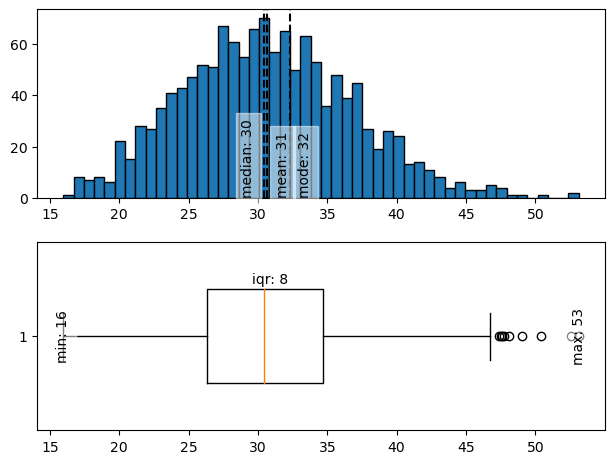

In [25]:
create_numeric_plots(bmi)

These plots show that within this dataset, the average bmi is 31. For adults 20 years or older, the bmi chart is as follows:
|BMI|Weight Status|
|:---|:---|
|Below 18.5|Underweight|
|18.5 – 24.9|Healthy Weight|
|25.0 – 29.9|Overweight|
|30.0 and Above|Obesity|

The data that we have does include ages below 20, but a general observation is that the trend in this dataset is that, with a median of 30, over half of the observations are included in the "Obecity" weight status. with the majority of poeple between 25 and 35, which is another observation showing the above healthy weight trend.

there are also a few outliers on the high end that are VERY HIGH

### Children

{'mean': 1.0949177877429, 'median': 1, 'mode': 0, 'range': 5, 'iqr': 2.0, 'stdev': 1.2054927397819137, 'variance': 1.4532127456669048, 'max': 5, 'min': 0}


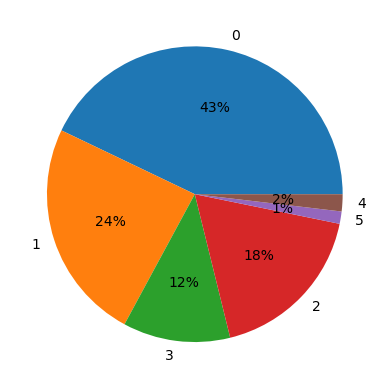

In [50]:
children_info=get_categorical_variable_info(children)
children_numerical_info = get_numerical_variable_info(children)
print(children_numerical_info)


import matplotlib.pyplot as plt
import numpy as np

plt.pie(children_info['percentage'].values(), labels = children_info['percentage'].keys(), autopct='%1.0f%%')
plt.show()


This chart shows that most people in this data set have no children, the average number of children for this dataset is 1.1. in 2020, the fertility rate (number of childen born per woman) is [1.64](https://en.wikipedia.org/wiki/Demographics_of_the_United_States#Vital_statistics:~:text=1.93-,1.64,-Life%20expectancy%20at).


### Charges


{'mean': 13270.422265141257, 'median': 9386.1613, 'mode': 1639.5631, 'range': 62648.554110000005, 'iqr': 11899.625365, 'stdev': 12110.011236694001, 'variance': 146652372.15285498, 'max': 63770.42801, 'min': 1121.8739}


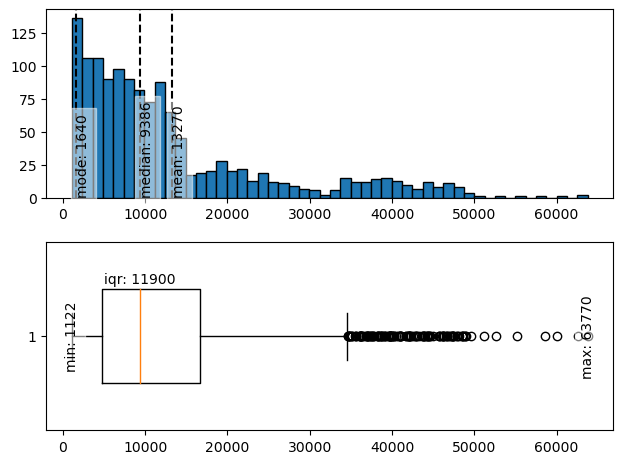

In [27]:
create_numeric_plots(charges)

this is an interesting graph, there is a strong scew to the right depicting that most poeple pay less than ~10,000. there are also 3 modes, one very stron one at the low end, one around ~20,000, and a third one ~40,000, with a few very high outliers above $60,000.

Thes multiple modes could be cause from other variables in the data. investication is needed to see if these smaller distibutions can be mapped via other variables.

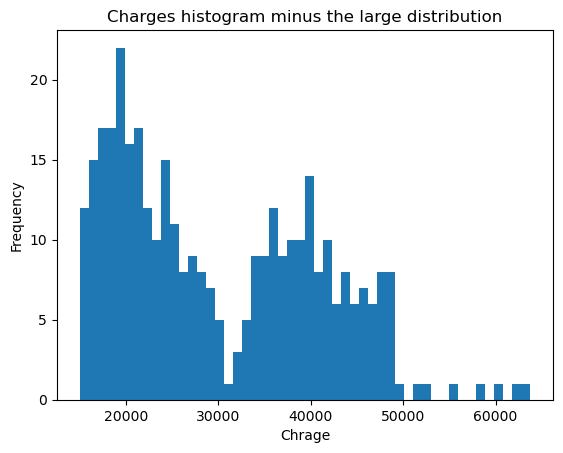

In [28]:
remove_mode_1 = [i for i in charges if i > 15000] #rough estimate

import matplotlib.pyplot as plt

plt.hist(remove_mode_1, bins = 50)
plt.title("Charges histogram minus the large distribution")
plt.xlabel("Chrage")
plt.ylabel("Frequency")

plt.show()

Removeing the large distribution form the data shows to more very clear distributions that will need to be investigated for corelation.

### Sex 

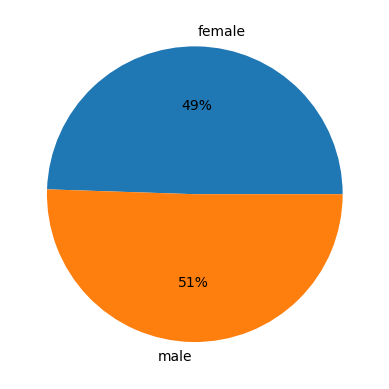

In [48]:
sex_info=get_categorical_variable_info(sex)



import matplotlib.pyplot as plt
import numpy as np

plt.pie(sex_info['percentage'].values(), labels = sex_info['percentage'].keys(), autopct='%1.0f%%')
plt.show()


this shows a very even split between males and females within this dataset.

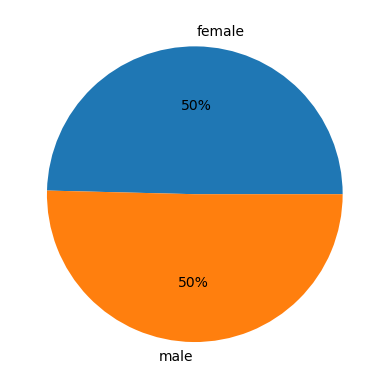

In [49]:
import matplotlib.pyplot as plt

plt.pie([total_female,total_male], labels = ['female', 'male'], autopct='%1.0f%%')
plt.show()
    

comparing these two plots the male/female split in this dataset is aligned with the total us population data

### Smoker

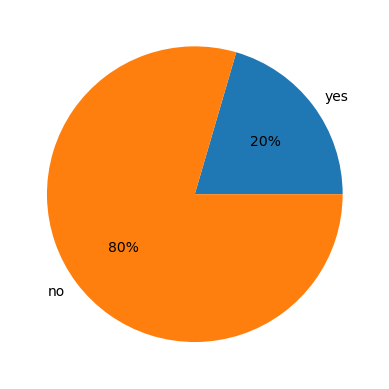

In [51]:
smoker_info=get_categorical_variable_info(smoker)

import matplotlib.pyplot as plt
import numpy as np

plt.pie(smoker_info['percentage'].values(), labels = smoker_info['percentage'].keys(), autopct='%1.0f%%')
plt.show()


there is a majority of non smokers within this dataset. this is one variable that should be tested to see corellations against the charges variable.

### Region

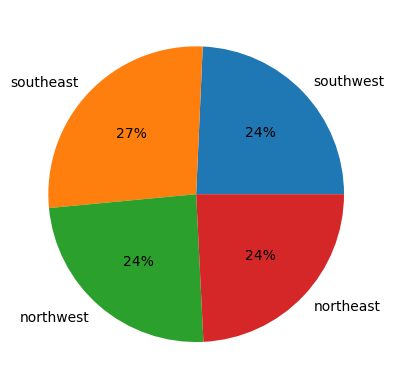

In [52]:
region_info=get_categorical_variable_info(region)

import matplotlib.pyplot as plt
import numpy as np

plt.pie(region_info['percentage'].values(), labels = region_info['percentage'].keys(),  autopct='%1.0f%%')
plt.show()


this shows a very even split over the regions apart from a slight increase in the south east region

# Exploritory Analysis

## Questions

### Questions to ask about data collection
- Why is there a spike of people of ages 19-20?
- why are there no data points ager age 64?
- Why is there slightly more data points in the south east reagion? 

### Trends to analyse  
i will analyse the charges variable first as this is an important vaiable about Health Insurance. 
- age -> charges
- sex -> charges
- bmi -> charges
- children -> charges
- smoker -> charges  

From here i will see if there are any strong correlations and correlate those variables with others to see if that shows any other interesting features. 

